# Purpose #
A couple of weeks ago at Stanford on using machine learning to delineate the complex structure of a cell population from information-rich datasets. At one point in the talk the speaker made an offhand comment data so simple "that a five year old could cluster it". Wow, were you that smart at five?

Anyway, I don't have kids, but I know enough about them that young children always ask, "*why?*" Maybe that five-year old mindset is instructive in machine learning. I think I've had a good intuitive grasp of Principcal Component Analysis (PCA) *as a black box*. That is, I know it is a way to reduce multidimensional datasets down to discover potentially interesting axes of variation.

But my eyes gloss over when I start hearing about reconstituting the data matrix, etc. So I want to take that position of the five year old, and ask "Why?" To do this, I want to understand the actual operations of PCA, rather than the pre-packaged R function.

FYI, [this](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf) is excellent background reading.

First use a pre-loaded R dataset of crime incidence by state. First, let's see the data.

In [89]:
head(USArrests)
library(cluster)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10,263,48,44.5
Arizona,8.1,294,80,31
Arkansas,8.8,190,50,19.5
California,9,276,91,40.6
Colorado,7.9,204,78,38.7


1) The first step we need to take is to center the data.

"*Why?*"
If we don't, the highest variance in the data would just be driven by the distance to the origin.

An optional step is to scale the data, since if a particular variable has a higher magnitude, it will tend to dominate the variance captured by PCA. There is not a convention on whether scaling should always be done or not. Here, I'll skip it.

In [90]:
centerData = scale(USArrests,scale=F)
head(centerData)

,Murder,Assault,UrbanPop,Rape
Alabama,5.412,65.240,-7.540,-0.032
Alaska,2.212,92.240,-17.540,23.268
Arizona,0.312,123.240,14.460,9.768
Arkansas,1.012,19.240,-15.540,-1.732
California,1.212,105.240,25.460,19.368
Colorado,0.112,33.240,12.460,17.468


2) Next up, calculate the covariance matrix.  

"*Why?*"  

Because covariance will tell us if two variables tend to increase or decrease together, summarized by a positive or negative sign. 
"*What is covariance*"
Well, consider the relationship between two variables, x and y. The covariance would be

$$(y_{mean} - y_{i}) * (x_{mean} - x_{i})$$

*What does that mean?*

Okay, let's think about some data we know that co-vary, thus they should have a positive covariance.

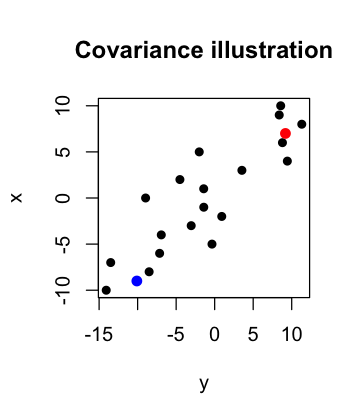

In [98]:
options(repr.plot.height=3.5 , repr.plot.width=3)
x = -10:10
y = x + rnorm(length(x),sd=3)
cols = rep('black',length(x)); cols[2]='blue'; cols[2]='blue'; cols[18]='red'
cexs=rep(1,length(x)); cexs[c(2,18)]=1.2;
#?rnorm
plot(y,x,col=cols,cex=cexs,pch=16,main='Covariance illustration')

So, lets consider the two points, shown in red and blue. First, the red point. If you calculate $(y_{mean} - y_{i})$, you get a negative value. Similarly, $(x_{mean} - x_{i})$ is negative. So two negatives multiplied is positive. For the blue point, both $(x_{mean} - x_{i})$ and $(y_{mean} - y_{i})$ are positive and their product is also positive.

So, the covariance quantifies this relationship, which here we can see by eye. If the data are anticorrelated, then the covariance will be negative.

The covariance matrix quantifies every combination of variables. Thus if you have $n$ samples and $p$ variables, the covariance matrix will be a square $p * p$ matrix. 

Okay, let's compute it.

In [92]:
cvMat = cov(centerData)

3) Calculate the eigenvectors/eigenvalues of the covariance matrix.

In [93]:
#1, mean center the data
centerData = scale(USArrests,scale=F)

#2, calculate covariance matrix
cvMat = cov(centerData)

#3, calculate eigenfunctions and eigenvectors
eigData = eigen(cvMat)
eigVec = eigData$vectors
eigVal = eigData$values

#4, compute new data from feature vector (comprised of eigenvectors)
dataInPC = t(eigVec) %*% t(USArrests)
dataInPC = scale(t(dataInPC),scale=F)

# compare this with the built-in package
head(scale(dataInPC,scale=F,center=T))
head(pca$scores)

Alabama,-64.802164,11.448007,-2.494933,2.407901
Alaska,-92.827450,17.982943,20.126575,-4.094047
Arizona,-124.068216,-8.830403,-1.687448,-4.353685
Arkansas,-18.3400354,16.7039114,0.2101894,-0.5209936
California,-107.422953,-22.520070,6.745873,-2.811826
Colorado,-34.975986,-13.719584,12.279363,-1.721464


,Comp.1,Comp.2,Comp.3,Comp.4
Alabama,-64.802164,11.448007,-2.494933,2.407901
Alaska,-92.827450,17.982943,20.126575,-4.094047
Arizona,-124.068216,-8.830403,-1.687448,-4.353685
Arkansas,-18.3400354,16.7039114,0.2101894,-0.5209936
California,-107.422953,-22.520070,6.745873,-2.811826
Colorado,-34.975986,-13.719584,12.279363,-1.721464


Now, let's run PCA using the built-in R method

In [94]:
pca = princomp(USArrests)
summary(pca)

Importance of components:
                           Comp.1      Comp.2      Comp.3       Comp.4
Standard deviation     82.8908472 14.06956001 6.424204055 2.4578367034
Proportion of Variance  0.9655342  0.02781734 0.005799535 0.0008489079
Cumulative Proportion   0.9655342  0.99335156 0.999151092 1.0000000000

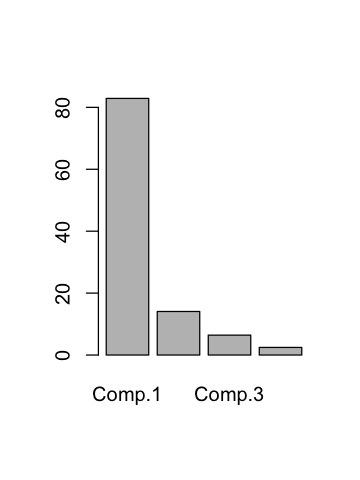

In [95]:
## Formula interface
options(repr.plot.height=4 , repr.plot.width=3)
barplot(pca$sdev)

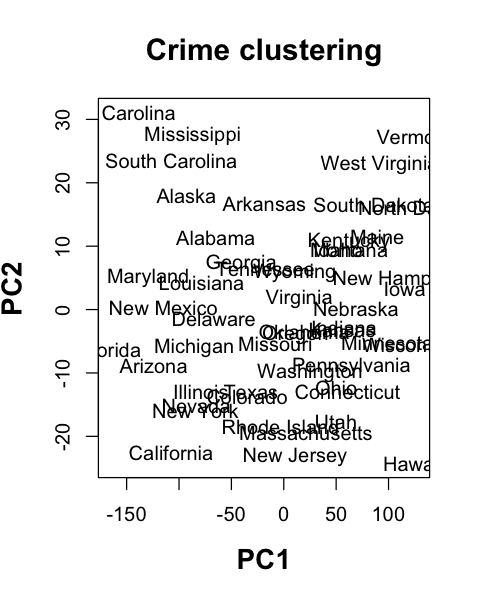

In [96]:
#pca$scores
par(font.lab = 2,cex.lab=1.4,cex.main=1.5)
options(repr.plot.height=5 , repr.plot.width=4)
plot(pca$scores[,1:2],type='n',xlab = 'PC1',ylab = 'PC2',main="Crime clustering")
text(pca$scores[,1:2], labels=row.names(USArrests), cex=1)

In [8]:
pca$sdev

Comp.1    Comp.2    Comp.3    Comp.4 
82.890847 14.069560  6.424204  2.457837

In [9]:
pca$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder                         0.995
Assault  -0.995                     
UrbanPop        -0.977 -0.201       
Rape            -0.201  0.974       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

In [10]:
#I dont understand what is happening. I think I got the steps right, but my handmade pca doesn't match the algorithm...

In [12]:
#How to 
eigData
for (i in eigVal)
    print(i/sum(eigVal)*100)
    #print(sum(eigVal))

-0.04170432,0.04482166,0.07989066,0.99492173
-0.99522128,0.05876003,-0.06756974,-0.03893830
-0.04633575,-0.97685748,-0.20054629,0.05816914
-0.07515550,-0.20071807,0.97408059,-0.07232502


[1] 96.55342
[1] 2.781734
[1] 0.5799535
[1] 0.08489079


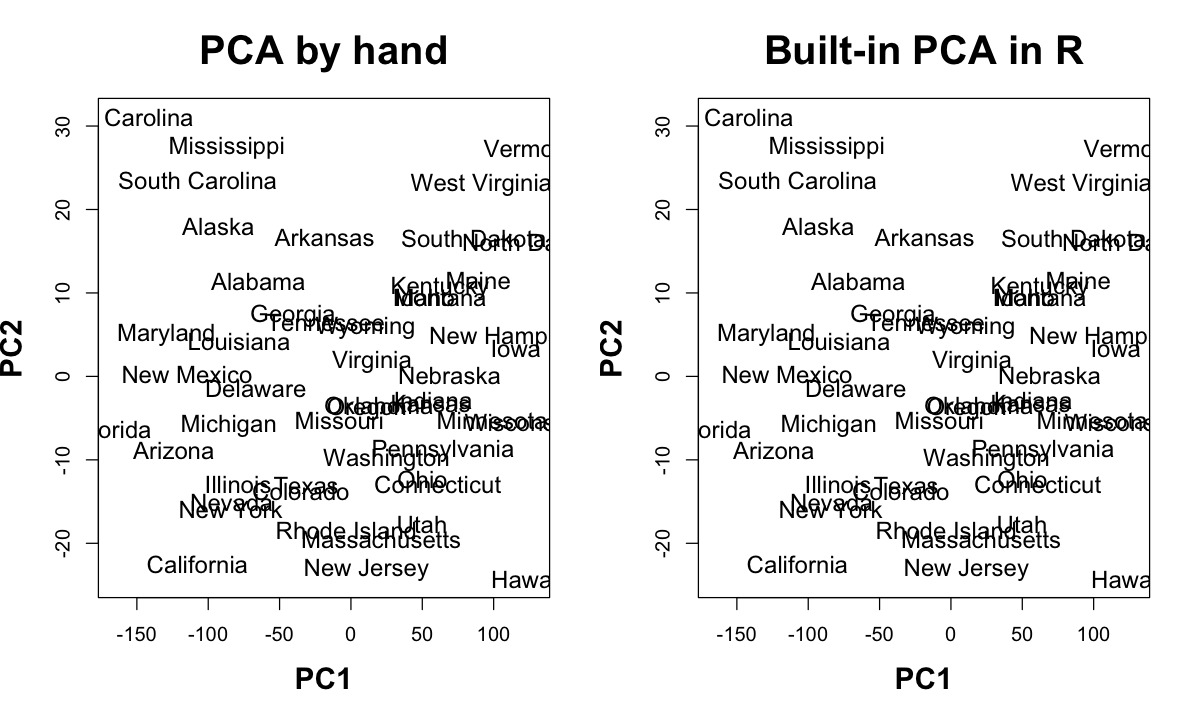

In [13]:
options(repr.plot.height=6 , repr.plot.width=10)
# PCA calculated by hand
par(mfrow=c(1,2),font.lab=2,cex.lab=1.5,cex.main=2)
plot(dataInPC[,1:2],type='n',xlab='PC1',ylab='PC2',main='PCA by hand')
text(dataInPC[,1:2], labels=row.names(dataInPC), cex=1.2)

# PCA calculated by `printcomp` function
plot(pca$scores[,1:2],type='n',xlab='PC1',ylab='PC2',main='Built-in PCA in R')
text(pca$scores[,1:2], labels=row.names(USArrests), cex=1.2)